In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train.shape

(891, 12)

In [5]:
x,y = train['Sex'].value_counts()
x

577

([<matplotlib.patches.Wedge at 0x248efc65208>,
 [Text(-0.4919454136803954, 0.9838646807152012, ''),
  Text(0.4919455057964525, -0.9838646346559433, '')])

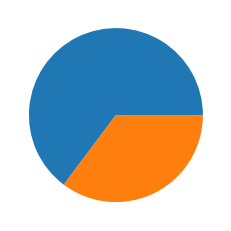

In [6]:
fig1, ax1 = plt.subplots()
ax1.pie(train['Sex'].value_counts())

In [7]:
x= train[train['Survived']==1]['Sex'].value_counts()
y= train[train['Survived']==0]['Sex'].value_counts()
z= train[train['Sex']=='male']['Survived'].value_counts()
z1 = train[train['Sex']=='female']['Survived'].value_counts()

([<matplotlib.patches.Wedge at 0x248efcdf508>,
 [Text(-0.911904088544833, 0.6151674026598107, ''),
  Text(0.9119040597467671, -0.6151674453491218, '')])

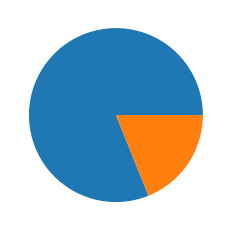

In [8]:
plt.pie(z)

In [9]:
sur = train[train['Survived']==1]['Sex'].value_counts()
print(sur)
dea = train[train['Survived']==0]['Sex'].value_counts()
print(dea)

female    233
male      109
Name: Sex, dtype: int64
male      468
female     81
Name: Sex, dtype: int64


In [10]:
grp = train['Sex'].value_counts()
grp.index

Index(['male', 'female'], dtype='object')

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
def pie_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    unsurvived = train[train['Survived'] == 0][feature].value_counts()
    feature_index = survived.index
    feature_index2 = unsurvived.index
    explode = (0,0.1)
    fig1, ax1 = plt.subplots()
    ax1.pie(survived, labels=feature_index,autopct='%1.1f%%')
    ax1.set_title(feature+' survived ratio')
    fig2, ax2 = plt.subplots()
    ax2.pie(unsurvived, labels= feature_index2,autopct='%1.1f%%')
    ax2.set_title(feature+' dead ratio')
    #plt.legend([ax1,ax2])
    plt.show()
    

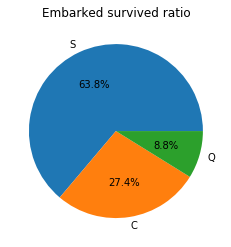

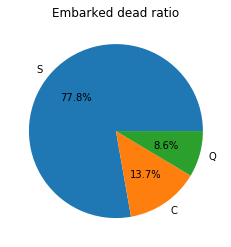

In [13]:
pie_chart('Embarked')

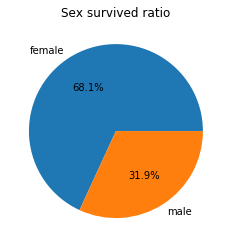

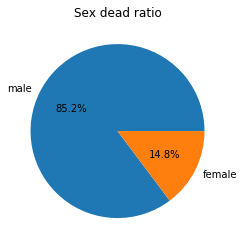

In [14]:
pie_chart('Sex')

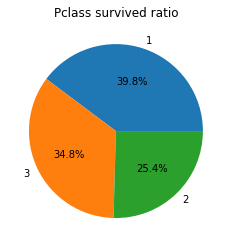

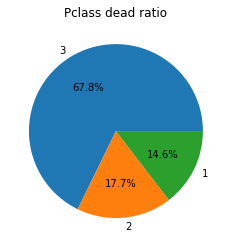

In [15]:
pie_chart('Pclass')

In [16]:
#The charts show that men and Pclass 3 have low survival rate
#While people from Southampton Embarkment had the highest survival ratio,
#it also has the highest death ratio, hence this feature will not be used
#for the trianing.

In [17]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    unsurvived = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,unsurvived])
    index = ['Survived','Dead']
    df.index = index
    df.plot(kind='bar',stacked=True)

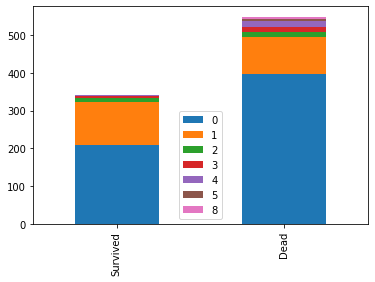

In [18]:
bar_chart("SibSp")

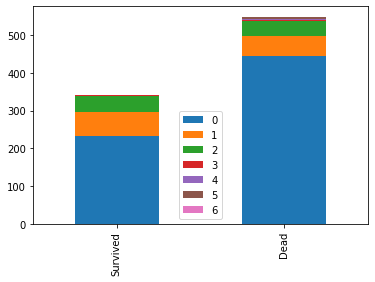

In [19]:
bar_chart("Parch")

In [20]:
whole = [train,test]

In [21]:
whole

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [22]:
type(train['Sex'][1])

str

In [23]:
train.describe(include = 'all')

PassengerId    Survived      Pclass                            Name  \
count    891.000000  891.000000  891.000000                             891   
unique          NaN         NaN         NaN                             891   
top             NaN         NaN         NaN  Kalvik, Mr. Johannes Halvorsen   
freq            NaN         NaN         NaN                               1   
mean     446.000000    0.383838    2.308642                             NaN   
std      257.353842    0.486592    0.836071                             NaN   
min        1.000000    0.000000    1.000000                             NaN   
25%      223.500000    0.000000    2.000000                             NaN   
50%      446.000000    0.000000    3.000000                             NaN   
75%      668.500000    1.000000    3.000000                             NaN   
max      891.000000    1.000000    3.000000                             NaN   

         Sex         Age       SibSp       Parch  Ticket        Fare Cabin  \
count    891  714.000000  891.000000  891.000000     891  891.000000   204   
unique     2         NaN         NaN         NaN     681         NaN   147   
top     male         NaN         NaN         NaN  347082         NaN    G6   
freq     577         NaN         NaN         NaN       7         NaN     4   
mean     NaN   29.699118    0.523008    0.381594     NaN   32.204208   NaN   
std      NaN   14.526497    1.102743    0.806057     NaN   49.693429   NaN   
min      NaN    0.420000    0.000000    0.000000     NaN    0.000000   NaN   
25%      NaN   20.125000    0.000000    0.000000     NaN    7.910400   NaN   
50%      NaN   28.000000    0.000000    0.000000     NaN   14.454200   NaN   
75%      NaN   38.000000    1.000000    0.000000     NaN   31.000000   NaN   
max      NaN   80.000000    8.000000    6.000000     NaN  512.329200   NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [24]:
#About 20% of Age is Null, so substitute mean value and then divide them into categorical grps
#I am going to use Sex, Age, SibSp(sibling on the ship),Parch(parents or children on the board) and Pclass.

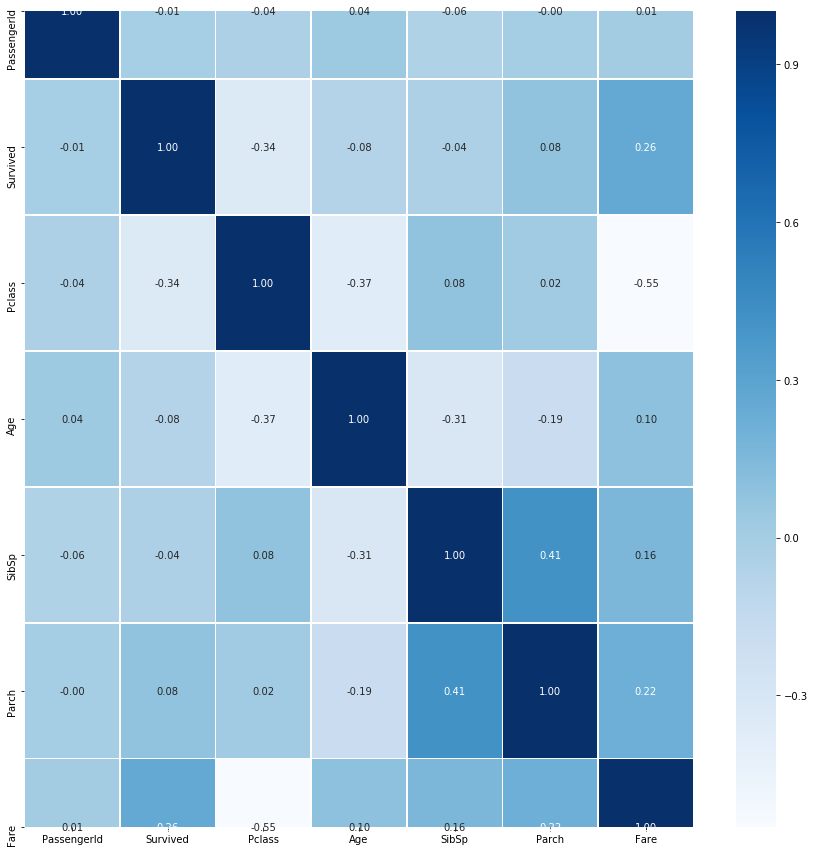

In [25]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [26]:
train1 = train[['Survived','Pclass','Sex','Age','SibSp','Parch']]

In [27]:
def age_convert(xs):
    for x in range(len(xs)):
        if xs[x] == 'male':
            xs[x] = 1
        if xs[x] == 'female':
            xs[x] = 0
    return xs

In [28]:
train1 = train1.fillna(train1.mean())
train1.describe() 
#filling null values with the mean

Survived      Pclass         Age       SibSp       Parch
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594
std      0.486592    0.836071   13.002015    1.102743    0.806057
min      0.000000    1.000000    0.420000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000
50%      0.000000    3.000000   29.699118    0.000000    0.000000
75%      1.000000    3.000000   35.000000    1.000000    0.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000

In [29]:
sex_map = {'male': 0, 'female':1}
train1['Sex']= train1['Sex'].map(sex_map)
train1
#train1['Sex_num']= train1['Sex'].map(sex_map)
#train1 = train1.drop(['Sex'],axis=1)
#train1.describe(include='all')
#replaced Sex with number and there are no null values

Survived  Pclass  Sex        Age  SibSp  Parch
0           0       3    0  22.000000      1      0
1           1       1    1  38.000000      1      0
2           1       3    1  26.000000      0      0
3           1       1    1  35.000000      1      0
4           0       3    0  35.000000      0      0
..        ...     ...  ...        ...    ...    ...
886         0       2    0  27.000000      0      0
887         1       1    1  19.000000      0      0
888         0       3    1  29.699118      1      2
889         1       1    0  26.000000      0      0
890         0       3    0  32.000000      0      0

[891 rows x 6 columns]

In [30]:
#Use cut to convert continuous to categorial 
bins = [0.0,2.0,18.0,65.0,100.0]
labels = ['Toddler','Child','Adult','Senior']
train1['AgeGroup'] = pd.cut(train1['Age'],bins=bins, labels=labels)
train1 = train1.drop(['Age'],axis=1)
train1

Survived  Pclass  Sex  SibSp  Parch AgeGroup
0           0       3    0      1      0    Adult
1           1       1    1      1      0    Adult
2           1       3    1      0      0    Adult
3           1       1    1      1      0    Adult
4           0       3    0      0      0    Adult
..        ...     ...  ...    ...    ...      ...
886         0       2    0      0      0    Adult
887         1       1    1      0      0    Adult
888         0       3    1      1      2    Adult
889         1       1    0      0      0    Adult
890         0       3    0      0      0    Adult

[891 rows x 6 columns]

In [31]:
age_map = {'Toddler': 0, 'Child':1, 'Adult': 2, 'Senior': 3}
train1['AgeGroup']= train1['AgeGroup'].map(age_map)
train1

Survived  Pclass  Sex  SibSp  Parch AgeGroup
0           0       3    0      1      0        2
1           1       1    1      1      0        2
2           1       3    1      0      0        2
3           1       1    1      1      0        2
4           0       3    0      0      0        2
..        ...     ...  ...    ...    ...      ...
886         0       2    0      0      0        2
887         1       1    1      0      0        2
888         0       3    1      1      2        2
889         1       1    0      0      0        2
890         0       3    0      0      0        2

[891 rows x 6 columns]

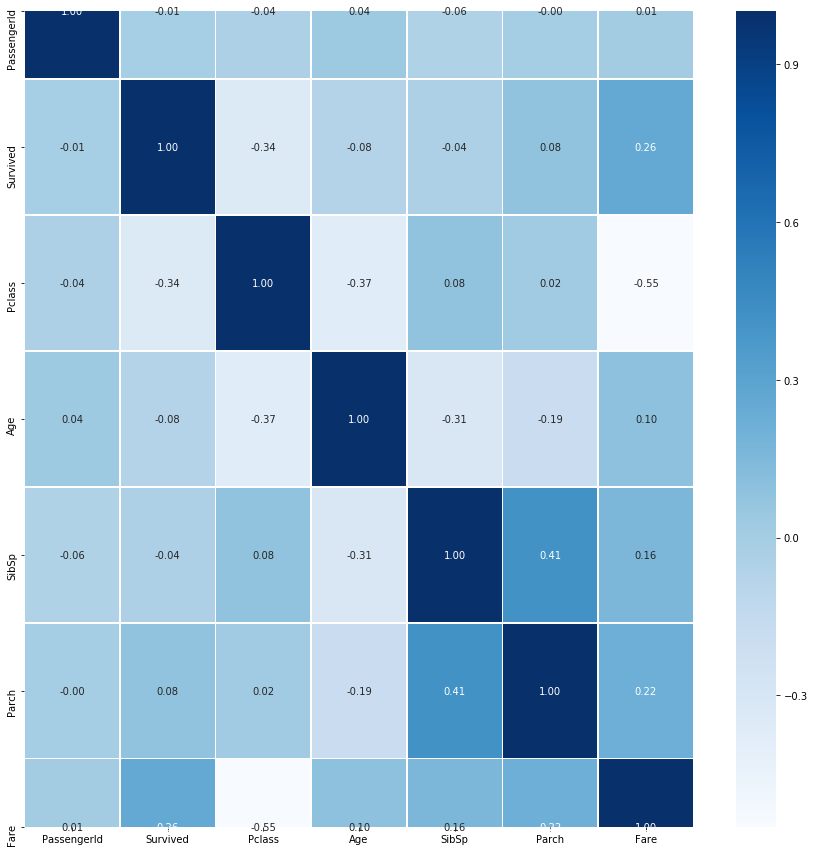

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [33]:
#Now make same for test data set
y_train = train1['Survived']
x_train = train1.drop(['Survived'],axis=1)

test1 = test[['Pclass','Sex','Age','SibSp','Parch']]
test1 = test1.fillna(test1.mean())
test1.describe(include= 'all')

sex_map = {'male': 0, 'female':1}
test1['Sex']= test1['Sex'].map(sex_map)
test1

bins = [0.0,2.0,18.0,65.0,100.0]
labels = ['Toddler','Child','Adult','Senior']
test1['AgeGroup'] = pd.cut(test1['Age'],bins=bins, labels=labels)
test1 = test1.drop(['Age'],axis=1)
age_map = {'Toddler': 0, 'Child':1, 'Adult': 2, 'Senior': 3}
test1['AgeGroup']= test1['AgeGroup'].map(age_map)
test1

Pclass  Sex  SibSp  Parch AgeGroup
0         3    0      0      0        2
1         3    1      1      0        2
2         2    0      0      0        2
3         3    0      0      0        2
4         3    1      1      1        2
..      ...  ...    ...    ...      ...
413       3    0      0      0        2
414       1    1      0      0        2
415       3    0      0      0        2
416       3    0      0      0        2
417       3    0      1      1        2

[418 rows x 5 columns]

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [60]:
lr = LogisticRegression()
k_fold = KFold(n_splits=10,shuffle= True, random_state=0)
score = cross_val_score(lr,x_train,y_train, cv=k_fold)
print(score)

[0.8        0.76404494 0.79775281 0.7752809  0.83146067 0.7752809
 0.78651685 0.82022472 0.83146067 0.80898876]


C:\Users\edwardkim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\edwardkim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\edwardkim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\edwardkim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\edwardkim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

In [61]:
svm1 = svm.SVC()
score1 = cross_val_score(svm1,x_train,y_train,cv=k_fold)
print(score1)


[0.82222222 0.79775281 0.80898876 0.80898876 0.85393258 0.78651685
 0.79775281 0.84269663 0.83146067 0.84269663]


C:\Users\edwardkim\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\edwardkim\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\edwardkim\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\edwardkim\Anaconda3\lib\site-packages\sklearn\svm\base.py:

In [62]:
lr_score = round(np.mean(score)*100,3)
svm_score = round(np.mean(score1)*100,3)
print("The score for logistic regression is " + str(lr_score))
print("The score for svm is " + str(svm_score))

The score for logistic regression is 79.91
The score for svm is 81.93


In [54]:
lr.fit(x_train,y_train)
pred = lr.predict(test1)

svm1.fit(x_train,y_train)
pred1 = svm1.predict(test1)

C:\Users\edwardkim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\edwardkim\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [55]:
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": pred1
})
submission.to_csv('submission_final.csv',index=False)

In [56]:
submission = pd.read_csv('submission_final.csv')
submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [40]:
survived = train1[train1['Survived'] == 1]['AgeGroup'].value_counts()
survived.index

CategoricalIndex([2, 1, 0, 3], categories=[0, 1, 2, 3], ordered=True, dtype='category')

In [41]:
type(test['PassengerId'])

pandas.core.series.Series